In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from RobotSim373 import *

Version:  0.0.14


In [10]:
def build(robot):    
    
    left=Box(robot,2,12,width=1,height=1,name='left')
    right=Box(robot,2,10,width=1,height=1,name='right')
    
    connect(left,right,'weld')  # revolves around the middle of the second object
    
    robot.current_force=0
    robot.current_force_angle=0
    robot.time_to_next_decision=0
    
    

In [14]:
def act(t,robot):
    
    if t>=robot.time_to_next_decision:  # new force
        robot.current_force=random.rand()*10
        robot.current_force_angle=random.rand()*360
        robot.time_to_next_decision=t+2.0  

    robot['left'].F=robot.current_force
    robot['right'].F=robot.current_force
    robot['left'].F_angle=robot.current_force_angle
    robot['right'].F_angle=robot.current_force_angle
    
        

Want a robot to randomly walk around.

1. pick a random point
2. move to that point
3. when you get there, repeat at step 1




1. pick a random force (magnitude and direction)
2. change the force at different times

1. choose a random force, and direction  - save to the robot (robot.current_force, etc...)
2. set the time to the next decision
3. if t < time to the next decision:
    - assign the current_force
4. otherwise (t>time to the next decision:
    - repeat 1.

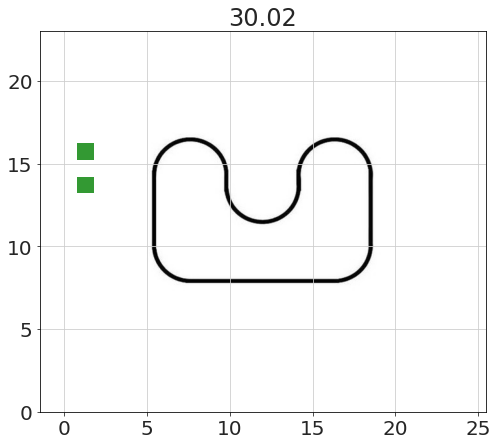

In [15]:
env=Environment(image='images/linepath1.jpeg',linearDamping=10) 
robot=Robot(env)

build(robot)

run_sim(env,act,
        total_time=30,  # seconds
        dt=1/60,
        dt_display=.5,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )

# take picture

In [24]:
def act(t,robot):
    
    if t>=robot.time_to_next_decision:  # new force
        robot.current_force=random.rand()*10
        robot.current_force_angle=random.rand()*360
        robot.time_to_next_decision=t+2.0  
        robot.take_picture('test %.1f.jpg' % t)

    robot['left'].F=robot.current_force
    robot['right'].F=robot.current_force
    robot['left'].F_angle=robot.current_force_angle
    robot['right'].F_angle=robot.current_force_angle
    
        

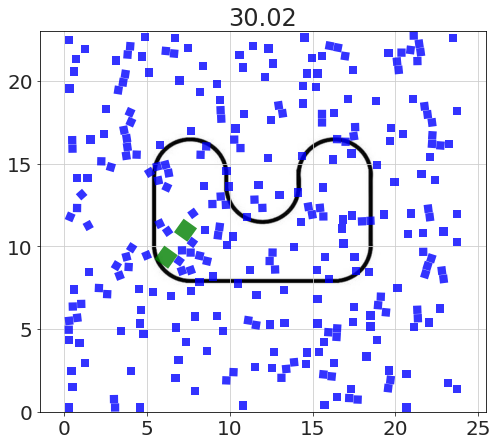

In [25]:
env=Environment(image='images/linepath1.jpeg',linearDamping=10) 
robot=Robot(env)

build(robot)

for i in range(300):
    b=Box(env,x=rand()*24,y=rand()*24,
          width=0.5,height=0.5)


run_sim(env,act,
        total_time=30,  # seconds
        dt=1/60,
        dt_display=.5,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )